In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read, Trace


st1 = read("Mars.mseed")
st2 = read('S0931a_DISP.mseed')
st3 = read('S0931a_VEL.mseed')

channels = ['BHZ']

# stream 
st1.filter(type='highpass', freq=0.01)
st1 = st1.select(component='Z')
print(st1)  

#trace 
tr1 = st1[0]
print(tr1)
print(tr1.stats) 
print(tr1.data)

# stream 
st2.filter(type='highpass', freq=0.1)
st2 = st2.select(component='Z')
print(st2)  

#trace 
tr2 = st2[0]
print(tr2)
print(tr2.stats) 
print(tr2.data)

# stream 
st3.filter(type='highpass', freq=0.1)
st3 = st3.select(component='Z')
print(st3)  

#trace 
tr3 = st3[0]
print(tr3)
print(tr3.stats) 
print(tr3.data)


1 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
         network: XB
         station: ELYSE
        location: 02
         channel: BHZ
       starttime: 2021-07-10T13:15:05.019000Z
         endtime: 2021-07-10T15:15:04.969000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 144000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2527, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 3881472})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 0.01}::type='highpass')"]
[  0.00000000e+00  -2.76230646e-16  -1.18856262e-15 ...,  -1.92007308e-10
  -1.92073006e-10  -1.92135313e-10]
1 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 sample

(2850.0, 3050.0)

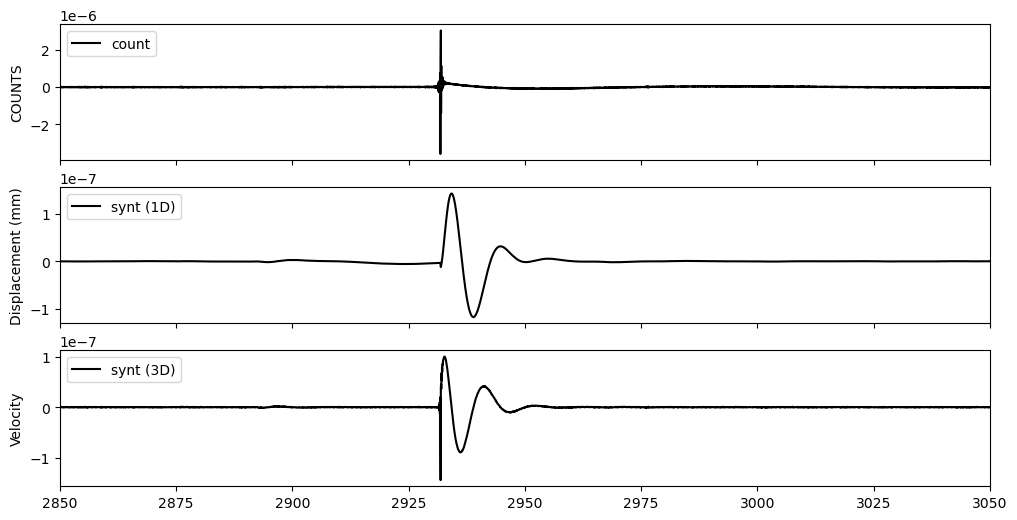

In [2]:
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(12, 6))
axes[0].plot(tr1.times(), tr1.data, "k", label="count")
axes[0].legend(loc=2)
axes[0].set_ylabel("COUNTS")

# accurate down to 8s (min period)
axes[1].plot(tr2.times(), tr2.data, "k", label="synt (1D)")
axes[1].legend(loc=2)
axes[1].set_ylabel("Displacement (mm)")

# accurate down to 8s (min period)
axes[2].plot(tr3.times(), tr3.data, "k", label="synt (3D)")
axes[2].legend(loc=2)
axes[2].set_ylabel("Velocity")
axes[2].set_xlim(2850, 3050)

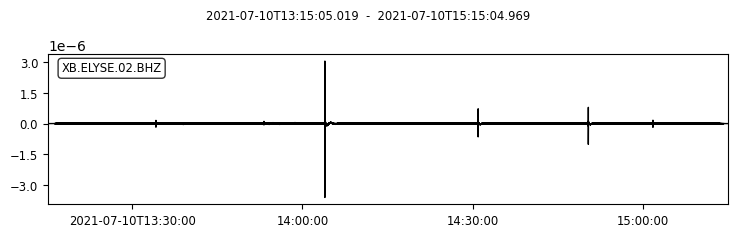

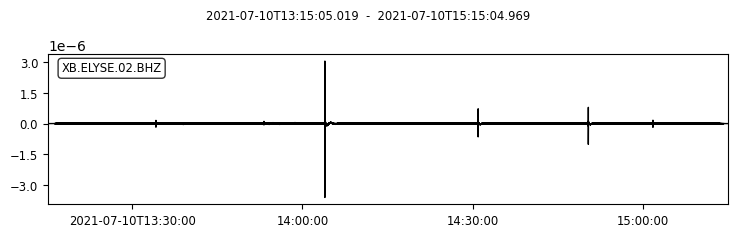

In [3]:
st1.plot()

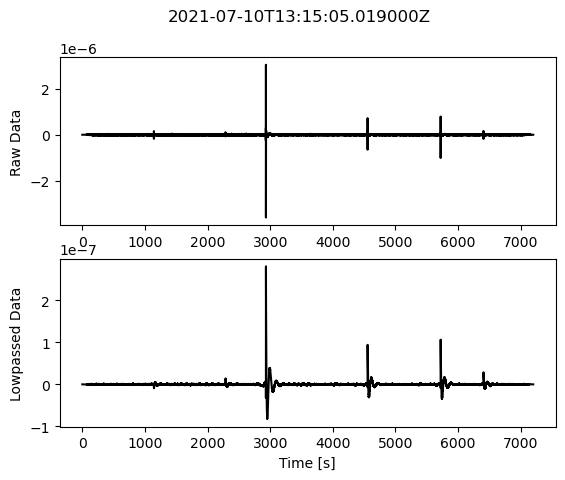

In [4]:
# Filtering with a lowpass on a copy of the original Trace
tr1_filt = tr1.copy()
tr1_filt.filter('lowpass', freq=1.0, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr1.stats.npts / tr1.stats.sampling_rate, tr1.stats.delta)
plt.subplot(211)
plt.plot(t, tr1.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr1_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr1.stats.starttime)
plt.show()

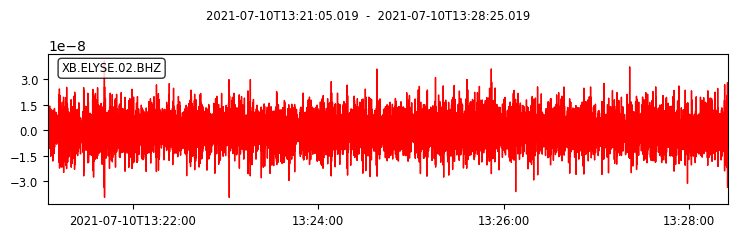

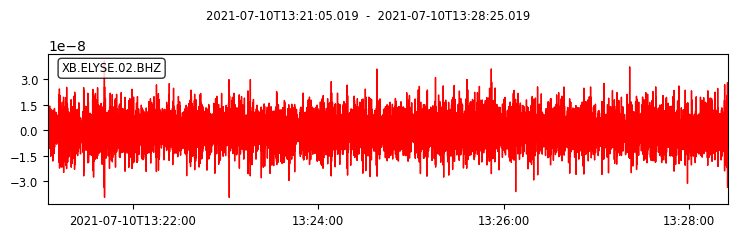

In [5]:
dt = st1[0].stats.starttime
st1.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

## Day Plots 



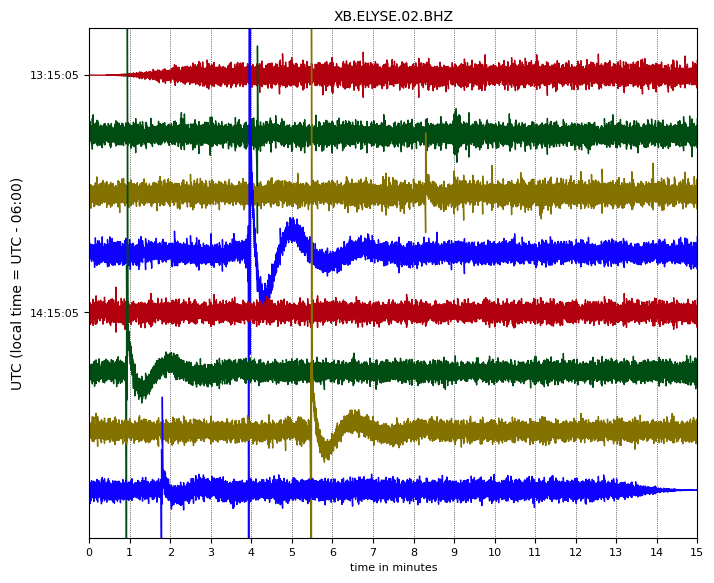

C:\Users\Chloe Locke\anaconda3\lib\site-packages\obspy\imaging\waveform.py:511: UserWarning: Could not download the events because of 'FDSNNoDataException: No data available for request.
Detailed response of server:

'.
  warnings.warn(msg)


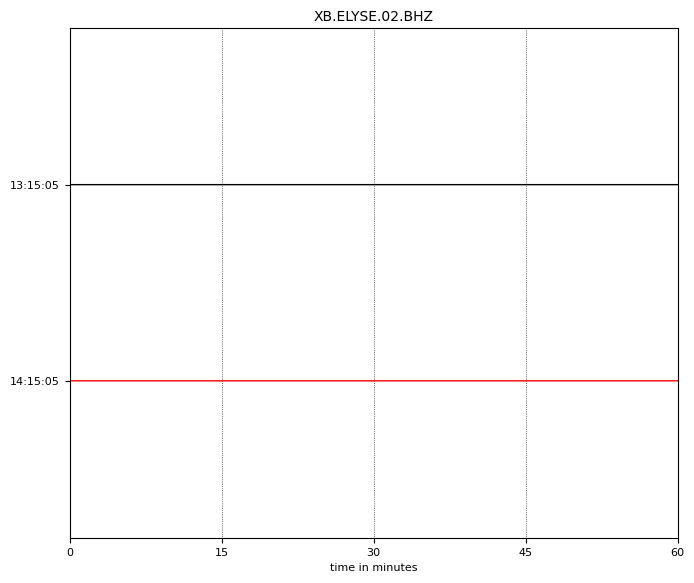

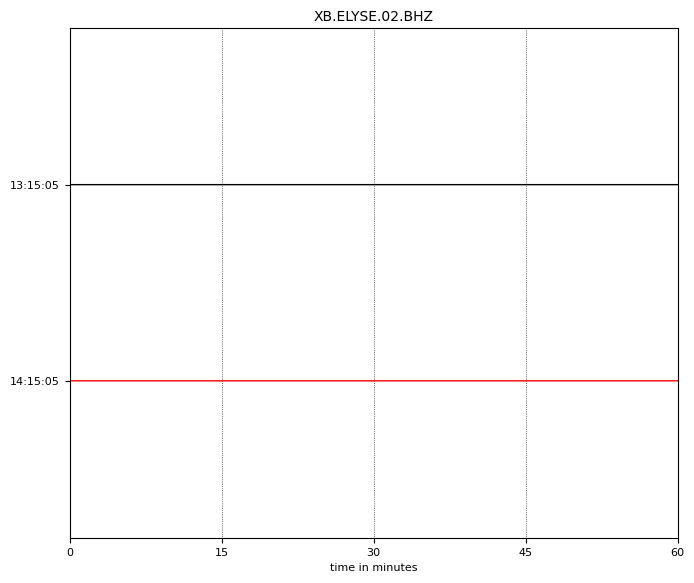

In [6]:
st1.plot(type='dayplot')

st1.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e3, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

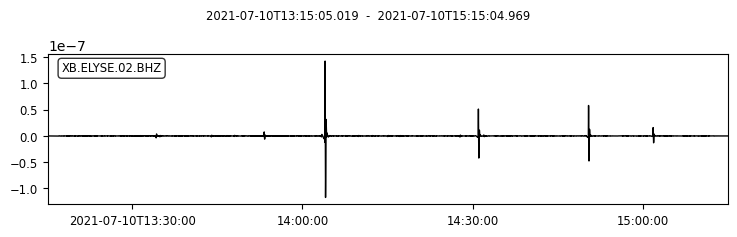

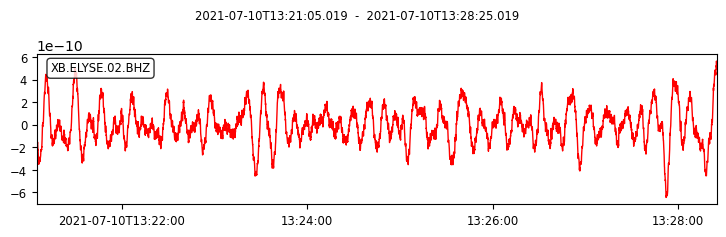

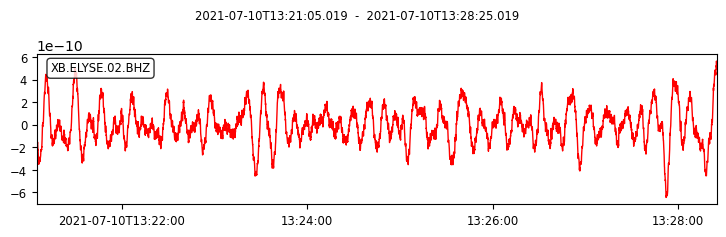

In [8]:
st2.plot()
dt = st2[0].stats.starttime
st2.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)